<a href="https://colab.research.google.com/github/seoes/odyssey-ai/blob/main/tracker_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Í∏∞Î≥∏ ÏÑ§Ï†ï

## Ï≤´ ÏÑ§Ï†ï

In [23]:
import torch
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Image
from collections import defaultdict

## YOLOv5 ÏÑ§Ïπò

In [24]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Cloning into 'yolov5'...
remote: Enumerating objects: 16088, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 16088 (delta 10), reused 14 (delta 2), pack-reused 16056
Receiving objects: 100% (16088/16088), 14.72 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (11042/11042), done.
/content/yolov5/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 üöÄ 2023-12-6 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.1M/14.1M [00:00<00:00, 134MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Supervision ÏÑ§Ïπò

In [25]:
!pip install supervision

import supervision as sv

colors = sv.ColorPalette.default()

# 2. Îç∞Ïù¥ÌÑ∞ ÏÑ∏ÌåÖ

## ÏòÅÏÉÅ Îã§Ïö¥Î°úÎìú

In [7]:
import os
HOME = os.getcwd()
%cd {HOME}

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vcKRPpv7ve1St-0rynhGa-H3lHMyCNt9' -O exhibition-64-sample.mp4
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ERyxsKGZmJZFgOBKGwVguQFqGJbYu575' -O exhibition-32-sample.mp4
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Mcp8xRYhsaxE3SfGAUaeJk63rNNkx80d' -O exhibition-4-sample.mp4
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jEhErOcFKt7JrliQFzMar5yerHkTeu09?' -O exhibition-64-full.mp4
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jEhErOcFKt7JrliQFzMar5yerHkTeu09' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jEhErOcFKt7JrliQFzMar5yerHkTeu09" -O exhibition-64-full.mp4 && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WJpbbx-w3QCFVmB0D0892vWVBCWdL3Kn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WJpbbx-w3QCFVmB0D0892vWVBCWdL3Kn" -O exhibition-64-test.mp4 && rm -rf /tmp/cookies.txt

# !wget --no-check-certificate 'https://googledrive.com/host/exhibition/1jEhErOcFKt7JrliQFzMar5yerHkTeu09' -O exhibition-64-full.mp4

/content/yolov5
--2023-12-06 04:20:59--  https://drive.google.com/uc?export=download&id=1vcKRPpv7ve1St-0rynhGa-H3lHMyCNt9
Resolving drive.google.com (drive.google.com)... 172.217.212.101, 172.217.212.102, 172.217.212.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2rp7huk1p739l8bpk53tsjl1osl0c358/1701836400000/09162896557746415517/*/1vcKRPpv7ve1St-0rynhGa-H3lHMyCNt9?e=download&uuid=7515b805-b7ef-4f40-8518-59609b1ffbde [following]
--2023-12-06 04:20:59--  https://doc-08-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2rp7huk1p739l8bpk53tsjl1osl0c358/1701836400000/09162896557746415517/*/1vcKRPpv7ve1St-0rynhGa-H3lHMyCNt9?e=download&uuid=7515b805-b7ef-4f40-8518-59609b1ffbde
Resolving doc-08-0g-docs.googleusercontent.com (doc-08-0g-docs.googleusercontent.com)... 1

## ÏòÅÏÉÅ Í≤ΩÎ°ú ÏÑ§Ï†ï

In [8]:
SAMPLE_VIDEO_64 = f"{HOME}/exhibition-64-sample.mp4"
SAMPLE_VIDEO_32 = f"{HOME}/exhibition-32-sample.mp4"
SAMPLE_VIDEO_4 = f"{HOME}/exhibition-4-sample.mp4"
FULL_VIDEO_64 = f"{HOME}/exhibition-64-full.mp4"
TEST_VIDEO_64 = f"{HOME}/exhibition-64-test.mp4"

VIDEO = TEST_VIDEO_64

video_info = sv.VideoInfo.from_video_path(VIDEO)

## Polygon ÏÑ§Ï†ï

In [9]:
zone_coords = np.array([[378,260],[688,260],[1080,1745],[0,1745]])
polygon = zone_coords

## Annotator ÏÑ§Ï†ï

### ZoneAnnotator

Polygon Í∞íÏóê Îî∞Îùº Íµ¨Ïó≠ÏùÑ ÌëúÏãúÌïòÎäî Annotator

In [10]:
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

zone_annotator = sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(0),
        thickness=8,
        # text_thickness=8,
        # text_scale=4
    )

### BoundingBoxAnnotator

ÏÇ¨ÎûåÏùÑ Í∞êÏã∏Îäî ÏßÅÏÇ¨Í∞ÅÌòï Î∞ïÏä§

In [11]:
bounding_box_annotator = sv.BoundingBoxAnnotator(color=colors.by_idx(0),thickness=6)

### TraceAnnotator

ÏÇ¨ÎûåÏùò ÎèôÏÑ†ÏùÑ Îî∞ÎùºÍ∞ÄÎäî Íº¨Î¶¨

In [12]:
trace_annotator = sv.TraceAnnotator(color=colors.by_idx(0), trace_length=50,thickness=4)

### MaskAnnotator

ÏÇ¨ÎûåÏùÑ ÎçÆÎäî Mask

In [13]:
mask_annotator = sv.MaskAnnotator(color=colors.by_idx(0))

### LabelAnnotator

In [14]:
label_annotator = sv.LabelAnnotator(color=colors.by_idx(0))

# 3. ÎπÑÎîîÏò§ Î∂ÑÏÑù

In [ ]:
# !pip install ffmpeg-python
# import ffmpeg

# def trim_video(input_path, output_path, end_frame, fps=24):
#     """
#     input_path: ÏûÖÎ†• ÎπÑÎîîÏò§ ÌååÏùº Í≤ΩÎ°ú
#     output_path: Ï∂úÎ†• ÎπÑÎîîÏò§ ÌååÏùº Í≤ΩÎ°ú
#     end_frame: ÏûòÎùºÎÇº ÎßàÏßÄÎßâ ÌîÑÎ†àÏûÑ Î≤àÌò∏
#     fps: ÎπÑÎîîÏò§Ïùò ÌîÑÎ†àÏûÑ ÏÜçÎèÑ (Í∏∞Î≥∏Í∞í: 30)
#     """
#     end_time = end_frame / fps  # ÎßàÏßÄÎßâ ÌîÑÎ†àÏûÑÏóê Ìï¥ÎãπÌïòÎäî ÏãúÍ∞Ñ
#     (
#         ffmpeg
#         .input(input_path)
#         .output(output_path, vframes=end_frame, format='mp4')
#         .run(capture_stdout=True, capture_stderr=True)
#     )

# # ÏÇ¨Ïö© ÏòàÏãú
# OUTPUT_VIDEO = f"{HOME}/trimmed_video.mp4"
# trim_video(VIDEO, OUTPUT_VIDEO, 7200)  # Ïòà: Ï≤´ 1000 ÌîÑÎ†àÏûÑÎßå ÏûòÎùºÎÇ¥Í∏∞
# VIDEO=OUTPUT_VIDEO


In [15]:
tracker = sv.ByteTrack()

each_coord = []

def add_coordinates(detections, frame_number):
    global each_coord

    each_coord.append([])

    for detection in detections:

      coord = detection[0]

      center_x = int((coord[0] + coord[2]) / 2)
      bottom_y = int(coord[3])

      tracker_id = detection[4]

      each_coord[-1].append((frame_number, tracker_id, center_x, bottom_y))

def process_frame(frame:np.ndarray, i) -> np.ndarray:
    if i % 4 == 0:
      print(f"Processing frame {i}...")

      results = model(frame,size=1280)
      detections = sv.Detections.from_yolov5(results)

      mask = zone.trigger(detections=detections)
      detections = detections[mask]

      detections = detections[(detections.class_id == 0) & (detections.confidence > 0.2)]
      detections = tracker.update_with_detections(detections)

      labels = [
          str(tracker_id)
          for tracker_id
          in detections.tracker_id
      ]

      # print(detections)

      frame = zone_annotator.annotate(scene=frame.copy())
      frame = bounding_box_annotator.annotate(scene=frame.copy(), detections=detections)
      frame = trace_annotator.annotate(scene=frame.copy(), detections=detections)
      frame = mask_annotator.annotate(scene=frame.copy(), detections=detections)
      frame = label_annotator.annotate(scene=frame.copy(), detections=detections, labels=labels)

      # if i % 4 == 0:
        # add_coordinates(detections, i)
      add_coordinates(detections, i)


      # Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÌîÑÎ†àÏûÑ Ï∂úÎ†•
      # clear_output(wait=True)
      # _, buffer = cv2.imencode('.jpg', frame)
      # display(Image(data=buffer.tobytes()))

      return frame


sv.process_video(source_path=VIDEO, target_path=f"{HOME}/result.mp4",callback=process_frame)

for coords in each_coord:
  print(coords)

Processing frame 0...
Processing frame 4...
Processing frame 8...
Processing frame 12...
Processing frame 16...
Processing frame 20...
Processing frame 24...
Processing frame 28...
Processing frame 32...
Processing frame 36...
Processing frame 40...
Processing frame 44...
Processing frame 48...
Processing frame 52...
Processing frame 56...
Processing frame 60...
Processing frame 64...
Processing frame 68...
Processing frame 72...
Processing frame 76...
Processing frame 80...
Processing frame 84...
Processing frame 88...
Processing frame 92...
Processing frame 96...
Processing frame 100...
Processing frame 104...
Processing frame 108...
Processing frame 112...
Processing frame 116...
Processing frame 120...
Processing frame 124...
Processing frame 128...
Processing frame 132...
Processing frame 136...
Processing frame 140...
Processing frame 144...
Processing frame 148...
Processing frame 152...
Processing frame 156...
Processing frame 160...
Processing frame 164...
Processing frame 168

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

## Ïò§Îûò Î®∏Î¨¥Î•∏ idÍ∞í Ï†úÍ±∞

In [47]:
frame_rate = 24
frames_per_record = 4
one_minute_frames = (3 * 60 * frame_rate) / frames_per_record
threshold_distance = 700  # 1Î∂Ñ ÎèôÏïà Ïù¥ÎèôÌïú Í±∞Î¶¨Ïùò ÏûÑÍ≥ÑÍ∞í
object_data = {}
stationary_ids = set()

for frame_data in each_coord:
    for coord in frame_data:
        frame, obj_id, x, y = coord

        if obj_id not in object_data:
            object_data[obj_id] = {'frame': frame, 'last_x': x, 'last_y': y, 'total_distance': 0}
        else:
            data = object_data[obj_id]
            distance = ((x - data['last_x']) ** 2 + (y - data['last_y']) ** 2) ** 0.5
            data['total_distance'] += distance

            if (frame - data['frame']) >= one_minute_frames:
                if data['total_distance'] < threshold_distance:
                    stationary_ids.add(obj_id)
                data['frame'] = frame
                data['total_distance'] = 0
            data['last_x'], data['last_y'] = x, y

print(stationary_ids)

filtered_each_coord = []

for frame_data in each_coord:
    filtered_frame_data = [coord for coord in frame_data if coord[1] not in stationary_ids]
    filtered_each_coord.append(filtered_frame_data)

each_coord = filtered_each_coord



{132, 294, 455, 296, 522, 12, 13, 14, 243, 407, 410}


## Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï

In [48]:
width = 400
height = 2000

## Ï¢åÌëú Î≥ÄÌôò

In [49]:
# ÏõêÍ∑º Î≥ÄÌôòÏùÑ ÏúÑÌïú ÏÜåÏä§ Î∞è ÎåÄÏÉÅ Ï†ê Ï†ïÏùò
src_points = np.float32([[378,260],[688,260],[1080,1745],[0,1745]])
dst_points = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

# ÏõêÍ∑º Î≥ÄÌôò ÌñâÎ†¨ Í≥ÑÏÇ∞
M = cv2.getPerspectiveTransform(src_points, dst_points)

# ÎπÑÎîîÏò§Î•º Î°úÎìú
cap = cv2.VideoCapture(VIDEO)

# Ï≤´ ÌîÑÎ†àÏûÑÏùÑ ÏùΩÍ∏∞
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
warped_image = cv2.warpPerspective(frame, M, (width, height))

# Í∞ùÏ≤¥Î≥Ñ Í≤ΩÎ°úÎ•º Ï†ÄÏû•Ìï† defaultdict ÏÉùÏÑ±
trajectories = defaultdict(list)

for frame_coords in each_coord:
  for coord in frame_coords:
    frame,obj_id, x,y = coord
    # Ï¢åÌëúÏóê ÏõêÍ∑º Î≥ÄÌôò Ï†ÅÏö©
    transformed_coord = cv2.perspectiveTransform(np.array([[x, y]], dtype='float32').reshape(-1, 1, 2), M)
    # Î≥ÄÌôòÎêú Ï¢åÌëúÎ•º Í∞ùÏ≤¥ IDÏóê ÎßûÍ≤å Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    trajectories[obj_id].append((frame, transformed_coord[0][0][0], transformed_coord[0][0][1]))

# Ï∂úÎ†•

## Ïù¥ÎèôÍ≤ΩÎ°ú Ï∂úÎ†•

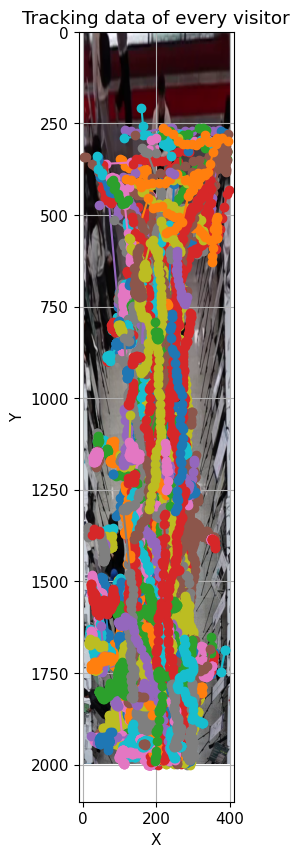

In [50]:
# Í∞Å Í∞ùÏ≤¥Î≥ÑÎ°ú Ï†ïÎ†¨Îêú Ï¢åÌëúÏóê Îî∞Îùº Í≤ΩÎ°ú Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(2, 10))
for obj_id, path in trajectories.items():
    # ÏãúÍ∞ÑÏóê Îî∞Îùº Í≤ΩÎ°ú Ï†ïÎ†¨
    sorted_path = sorted(path, key=lambda x: x[0])
    # Í≤ΩÎ°úÏùò x, y Ï¢åÌëúÎ•º Î∂ÑÎ¶¨
    x_coords, y_coords = zip(*[(x, y) for _, x, y in sorted_path])

    # Í≤ΩÎ°úÎ•º Í∑∏Î¶º
    plt.plot(x_coords, y_coords, marker='o', label=f'Object {obj_id}')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.imshow(warped_image)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tracking data of every visitor')
plt.xlim([0,width])
plt.ylim([height,0])
plt.grid(True)
plt.axis('equal')  # Ï∂ïÏùò Ïä§ÏºÄÏùºÏùÑ ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ï

# Í≤∞Í≥º ÌëúÏãú
plt.show()


## ÌûàÌä∏Îßµ Ï∂úÎ†•

### Î∞ÄÎèÑ Í≥ÑÏÇ∞

In [22]:
coords = []
for obj_id, path in trajectories.items():
    for frame, x, y in path:
        coords.append((x, y))
x, y = zip(*coords)

# Í∑∏Î¶¨Îìú ÌÅ¨Í∏∞ÏôÄ Ïª§ÎÑê Î∞òÍ≤Ω
grid_size = 1
h = 50

# Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
x_grid = np.arange(0, width+1, grid_size)
y_grid = np.arange(0, height+1, grid_size)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

def kde_quartic(d, h):
    dn = d / h
    P = (15 / 16) * (1 - dn ** 2) ** 2
    return np.where(dn <= 1, P, 0)

# Î∞ÄÎèÑ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Numpy Î∞∞Ïó¥ Ïó∞ÏÇ∞ ÏµúÏ†ÅÌôî
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
intensity_list = np.zeros_like(x_mesh, dtype=np.float64)

# Í∞Å Ï¢åÌëúÏóê ÎåÄÌï¥ Ìïú Î≤àÏóê Í≥ÑÏÇ∞
for i in range(len(x)):
    d_squared = (x_mesh - x[i])**2 + (y_mesh - y[i])**2
    d = np.sqrt(d_squared)
    p = kde_quartic(d, h)
    intensity_list += p

Ï∂úÎ†•

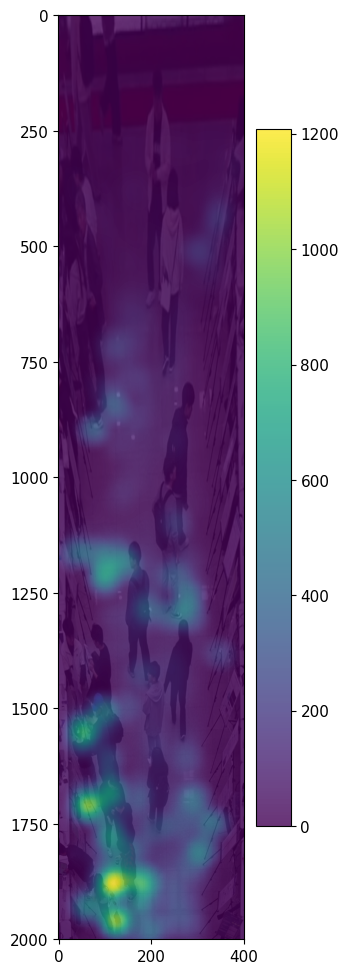

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
intensity = np.array(intensity_list)
plt.figure(figsize=(3, 12))
plt.imshow(warped_image)
plt.axis('equal')  # Ï∂ïÏùò Ïä§ÏºÄÏùºÏùÑ ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ï
plt.pcolormesh(x_mesh, y_mesh, intensity, shading='auto', alpha=0.8)
# plt.plot(x, y, 'ro')
plt.xlim([0,width])
plt.ylim([height,0])
plt.colorbar()
plt.show()